# Ploting and FT an audiofile
### For comparison with the results of the C++ project
Written by <b>Sergio Daniel Hernandez Charpak</b>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import wave

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/didier/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Loading the audiofile and plotting the signal

In [19]:
file_test="../tests/AudioFileTests/test-audio/wav_mono_16bit_44100.wav"

In [20]:
spf = wave.open(file_test,'r')
print(spf)

In [21]:
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
print(signal)

[  -1   -4  -41 ..., -305 -337 -383]


/home/didier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


In [22]:
print (signal[0:80])

[   -1    -4   -41   -87  -101   126   746  1075   784  -227 -1463 -1102
   445  1011   575   270   153  -182  -292  -475  -462 -1522 -2871 -2299
 -2169 -1262  2589  -503  2672  1470  4556  4288  4554  5579  5811  6585
  4960  5637  2118   607   -12 -1320  1652  4364  -692   452 -1999  1198
  4894 -2556  -989 -4478  2737  4826  2467  1432  1622  8509  7841 10806
  7907  8573  4763  5262  7618  3050  3837   594  2738  6819  7758  4859
  6463  5475  4960   580 -3135   246 -4002   382]


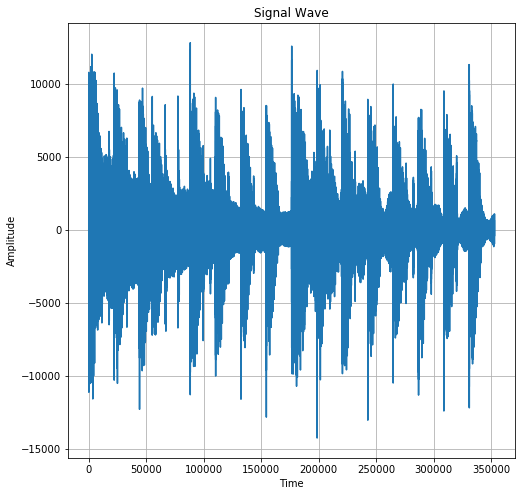

In [23]:
fig = plt.figure(figsize = (8,8))
plt.title('Signal Wave')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(signal)
plt.grid()
plt.show()

## Time in seconds

In [24]:
fs = spf.getframerate()

In [25]:
print ("Sample rate: ",fs)
print (len(signal))

Sample rate:  44100
352800


In [26]:
Time=np.linspace(0, len(signal)/fs, num=len(signal))

In [27]:
n_fin=len(signal)/fs
N=double(len(signal))
step=n_fin/N

In [28]:
print (Time[0:10])
print (step)

[  0.00000000e+00   2.26758012e-05   4.53516025e-05   6.80274037e-05
   9.07032049e-05   1.13379006e-04   1.36054807e-04   1.58730609e-04
   1.81406410e-04   2.04082211e-04]
2.26757369615e-05


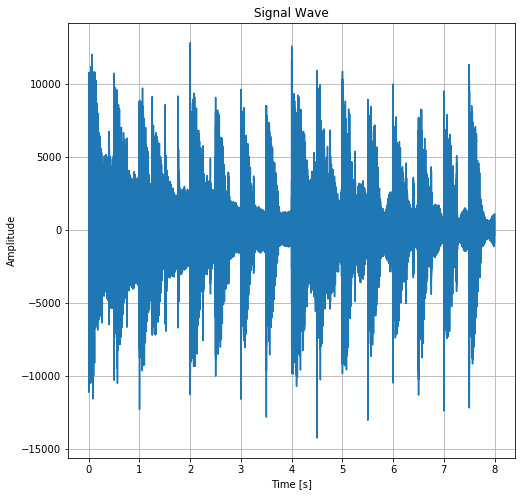

In [29]:
fig = plt.figure(figsize = (8,8))
plt.title('Signal Wave')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.plot(Time,signal)
plt.grid()
plt.show()

## Histogram

[    -1     -4    -41    -87   -101    126    746   1075    784   -227
  -1463  -1102    445   1011    575    270    153   -182   -292   -475
   -462  -1522  -2871  -2299  -2169  -1262   2589   -503   2672   1470
   4556   4288   4554   5579   5811   6585   4960   5637   2118    607
    -12  -1320   1652   4364   -692    452  -1999   1198   4894  -2556
   -989  -4478   2737   4826   2467   1432   1622   8509   7841  10806
   7907   8573   4763   5262   7618   3050   3837    594   2738   6819
   7758   4859   6463   5475   4960    580  -3135    246  -4002    382
   4403   3644    648    632   4605  10351   8640   3659   4098   2743
   2515  -5180  -5358  -3743  -2864   1118   3301   1435   4308   5581
   3316   9353   2404   5606   5549   6611   6861  -2251    -62  -1591
    -79  -3719  -2890  -5219  -3734  -1468  -2521   1277  -2822  -4174
  -4327  -2349  -2064   2365   1417    248  -3685  -7725  -8073 -11139
  -8789 -10478  -4111  -5447  -5549  -5425  -5432  -3544  -6481  -1798
  -613

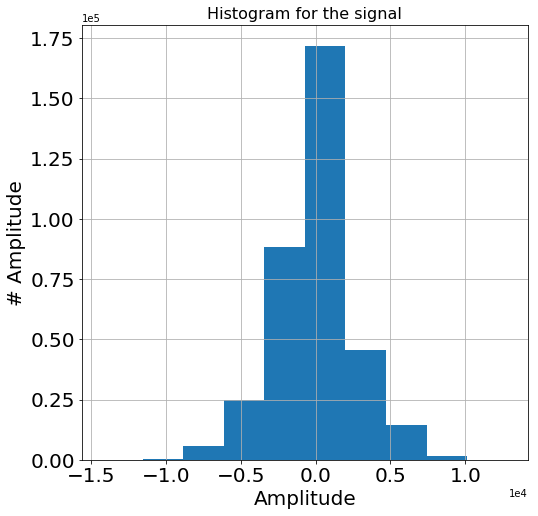

In [30]:
data_1D=signal.ravel()
print(data_1D[0:200])
fig = plt.figure(figsize = (8,8))
binwidth=(np.max(data_1D)-np.min(data_1D))/10
plt.hist(data_1D, bins=np.arange(np.min(data_1D), np.max(data_1D) + binwidth, binwidth))
plt.xlabel("Amplitude", fontsize=20)
plt.ylabel("# Amplitude", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), labelsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), labelsize=20)
plt.grid()
plt.title("Histogram for the signal", fontsize=16)
plt.show()
plt.close(fig)

## Fourier Transform

In [33]:
from scipy.fftpack import fft, fftfreq

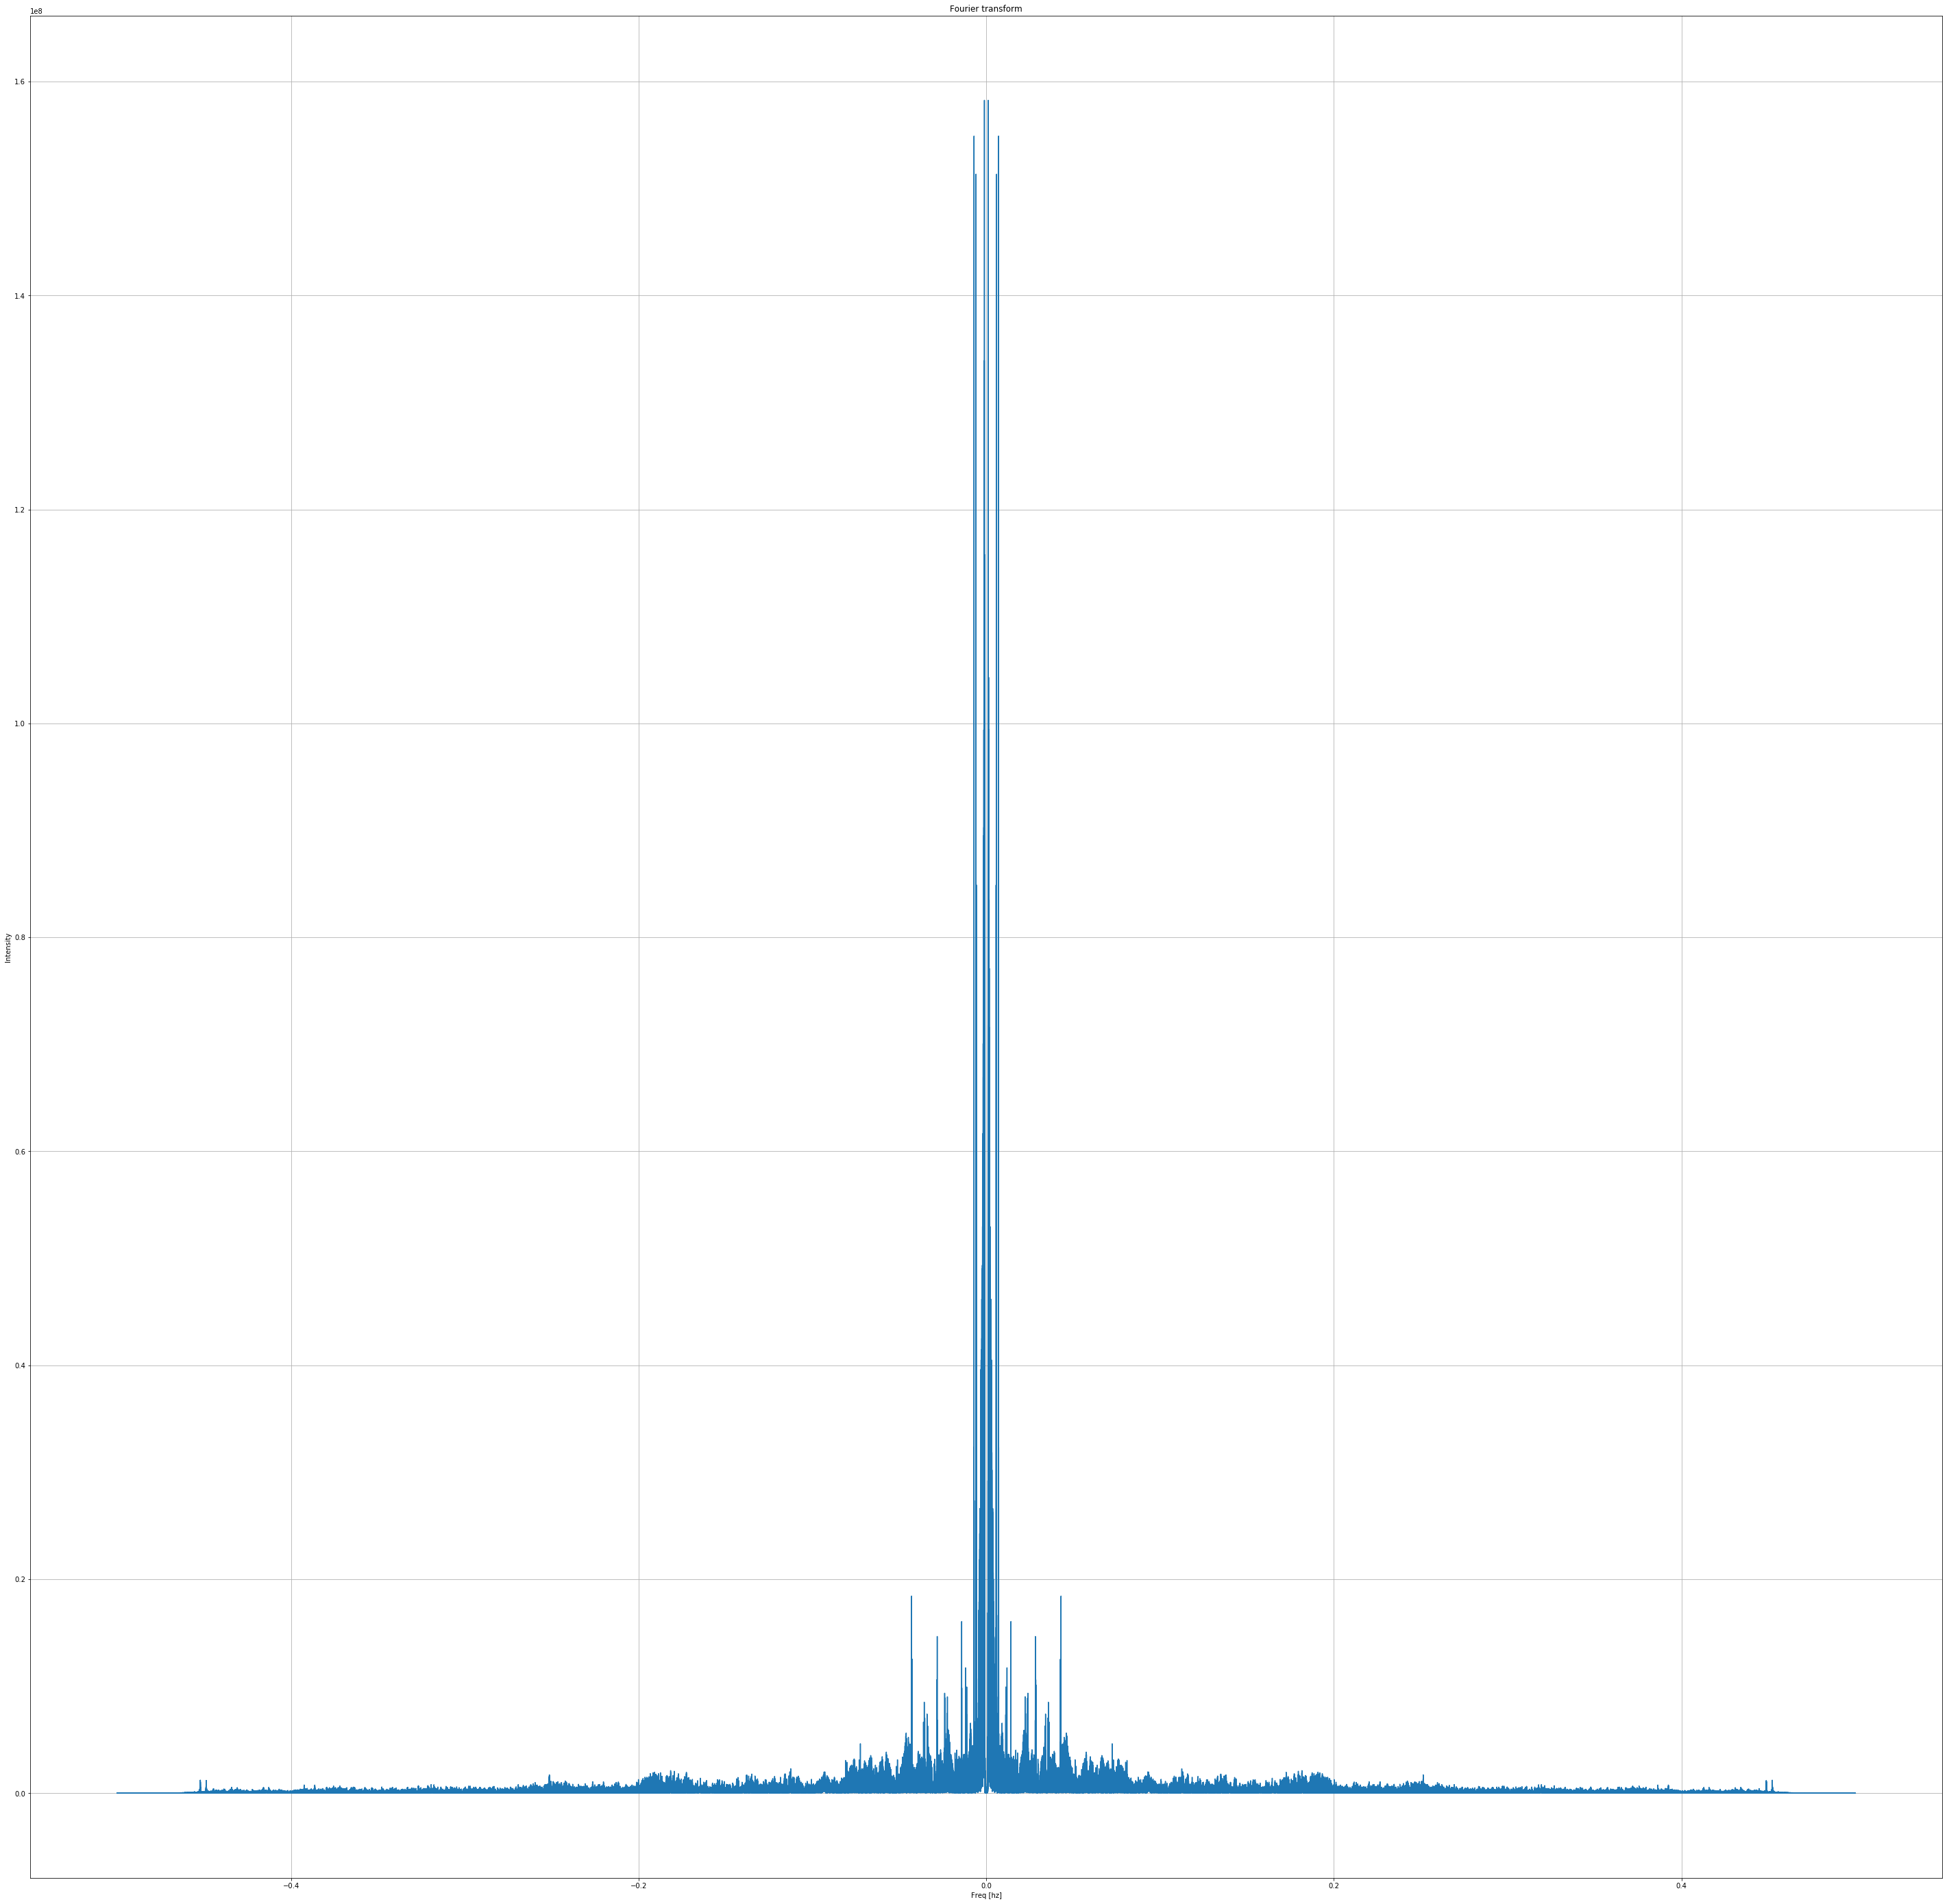

In [39]:
fig = plt.figure(figsize = (50,50))
n_points=len(signal)
fft_input_signal = fftshift(fft(signal))# / n_points )
freq = fftshift(fftfreq(n_points, 1) )
plt.plot(freq,abs(fft_input_signal))
xlabel('Freq [hz]')
ylabel('Intensity')
title('Fourier transform')
plt.grid()